# Cancer Detection using Logistic Regression

## Importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataframe

In [2]:
df1 = pd.read_csv("/Users/rakshitbatra/Downloads/mubravo/kaggle_prediction_features.csv")
df2 = pd.read_csv("/Users/rakshitbatra/Downloads/mubravo/kaggle_to_students.csv")
id_list = df1['Patient'].tolist()
df2 = df2.drop(['Patient'], axis = 1)

## Checking the imported dataframes

In [3]:
print(df1)

   Patient  age  timerecurrence  chemo  hormonal  amputation  histtype  diam  \
0     s154   40       15.104723      0         0           1         1    15   
1     s260   42        8.303901      1         0           0         1    18   
2     s209   41        6.480493      1         0           1         1    25   
3     s272   43        7.252567      1         1           1         1    18   
4     s354   47        6.160164      0         0           1         1    32   
5     s284   45        3.915127      1         1           1         1    40   
6     s367   49        0.572211      0         0           0         1    30   
7     s170   42       13.349760      1         0           1         1    25   
8     s311   42        4.219028      1         0           1         1    35   
9       s6   49       11.156742      0         0           0         1    13   
10    s339   45       16.591376      1         0           0         1    20   
11     s73   50        2.149213      0  

In [4]:
print(df2)

     age  eventdeath  timerecurrence  chemo  hormonal  amputation  histtype  \
0     45           0        7.874059      0         0           0         1   
1     43           1        3.121150      1         0           0         1   
2     48           0        8.366872      0         0           0         7   
3     50           0        6.045175      0         0           0         1   
4     46           1        8.128679      1         0           1         2   
..   ...         ...             ...    ...       ...         ...       ...   
212   44           0        6.874743      0         0           0         1   
213   39           0       10.907598      0         0           0         1   
214   50           0        5.637235      1         1           1         1   
215   52           1        2.209446      0         1           1         1   
216   41           1        2.004107      1         0           0         1   

     diam  posnodes  grade  angioinv  lymphinfil   

## Checking for Null Values in the DataFrame

In [5]:
df2.isna().sum()

age               0
eventdeath        0
timerecurrence    0
chemo             0
hormonal          0
amputation        0
histtype          0
diam              0
posnodes          0
grade             0
angioinv          0
lymphinfil        0
esr1              0
dtype: int64

## Plotting a Histogram to get the gist of the dataframe

<AxesSubplot:ylabel='Frequency'>

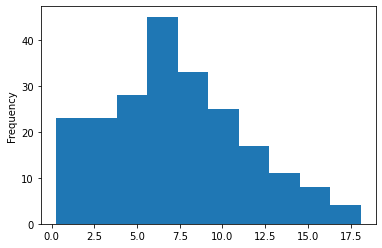

In [6]:
df2['timerecurrence'].plot.hist()

In [7]:
y = df2["eventdeath"]
x = df2.drop(["eventdeath"], axis=1)

## Importing the Logistic Regression Model 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=200)

## Performing the Train Test Split on the dataframe

In [9]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=1,train_size=0.1,random_state=1)

In [10]:
print(X_test)

    age  timerecurrence  chemo  hormonal  amputation  histtype  diam  \
78   41         8.80219      0         0           1         2    25   

    posnodes  grade  angioinv  lymphinfil      esr1  
78         0      1         1           1  0.226397  


## Initializing the Model and running it on the training set

In [11]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=32)  
classifier.fit(X_train,y_train)

/Users/rakshitbatra/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=32)

## Predicting Whether the Patient has Cancer or not

In [13]:
y_pred= classifier.predict(df1.drop(['Patient'], axis=1))
count = 0
list = []
for i in y_pred:
    if i==1:
        print(id_list[count],". Person is Dead")
    else:
        print(id_list[count],". Person Survives")
    count+=1

s154 . Person Survives
s260 . Person Survives
s209 . Person Survives
s272 . Person Survives
s354 . Person is Dead
s284 . Person is Dead
s367 . Person is Dead
s170 . Person Survives
s311 . Person is Dead
s6 . Person Survives
s339 . Person Survives
s73 . Person is Dead
s390 . Person Survives
s213 . Person Survives
s320 . Person Survives
s352 . Person Survives
s389 . Person is Dead
s296 . Person is Dead
s245 . Person Survives
s188 . Person Survives
s381 . Person is Dead
s71 . Person is Dead
s172 . Person is Dead
s166 . Person is Dead
s341 . Person is Dead
s131 . Person Survives
s145 . Person Survives
s357 . Person Survives
s251 . Person Survives
s147 . Person Survives
s257 . Person Survives
s196 . Person Survives
s294 . Person is Dead
s387 . Person is Dead
s13 . Person Survives
s128 . Person is Dead
s265 . Person is Dead
s195 . Person Survives
s264 . Person Survives
s263 . Person Survives
s148 . Person is Dead
s270 . Person is Dead
s117 . Person Survives
s141 . Person is Dead
s207 . Perso

## Training Score

In [154]:
classifier.score(X_train, y_train)

0.9047619047619048

## Testing Score

In [155]:
classifier.score(X_test, y_test)

1.0